**Author** : [Mochammad Arie Nugroho](https://github.com/arienugroho050396)

# <center> **Pakistan Used Cars**

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import plotly.express as px

## Read Dataset

In [4]:
cars_df = pd.read_csv('C:\My Files\Document\Coding\Datasheet\OLX_Car_Data_CSV.csv', encoding='latin1')
cars_df.head()

Brand Condition    Fuel  KMs Driven        Model    Price Registered City  \
0  Toyota      Used  Diesel         1.0        Prado  2100000         Karachi   
1  Suzuki      Used  Petrol    100000.0        Bolan   380000         Karachi   
2  Suzuki      Used     CNG     12345.0        Bolan   340000         Karachi   
3  Suzuki      Used  Petrol     94000.0         Alto   535000         Karachi   
4  Toyota      Used  Petrol    100000.0  Corolla XLI  1430000         Karachi   

  Transaction Type    Year  
0             Cash  1997.0  
1             Cash  2006.0  
2             Cash  1998.0  
3             Cash  2010.0  
4             Cash  2013.0

## Data Preparation and Cleaning 

In [5]:
cars_df.Brand.unique()

array(['Toyota', 'Suzuki', 'Honda', 'Daihatsu', 'Mitsubishi', 'KIA',
       'Other Brands', 'Nissan', 'BMW', 'Mazda', 'Chevrolet', 'Daewoo',
       'Hyundai', 'FAW', 'Mercedes', 'Classic & Antiques', 'Lexus',
       'Audi', 'Range Rover', nan, 'Changan', 'Porsche', 'Subaru',
       'Land Rover'], dtype=object)

In [6]:
years = cars_df.Year.unique()

In [7]:
np.sort(years)

array([1915., 1925., 1943., 1951., 1952., 1956., 1960., 1962., 1963.,
       1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972., 1973.,
       1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982.,
       1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991.,
       1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000.,
       2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009.,
       2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.,
       2019., 2020.,   nan])

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


In [9]:
cars_df.describe()

KMs Driven         Price          Year
count  2.268700e+04  2.497300e+04  22689.000000
mean   1.278112e+05  9.128953e+05   2005.901626
std    5.996726e+05  1.537134e+06      9.563804
min    1.000000e+00  5.000000e+04   1915.000000
25%    1.600000e+04  3.800000e+05   2002.000000
50%    6.651000e+04  6.500000e+05   2008.000000
75%    1.000000e+05  1.145000e+06   2013.000000
max    1.000000e+07  8.765432e+07   2020.000000

### Replacing Missing Values

In [10]:
cars_df['KMs Driven'].replace(np.nan, cars_df['KMs Driven'].mean(), inplace=True)

In [11]:
cars_df.Year.replace(np.nan, cars_df.Year.mean(), inplace=True)

In [12]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        24973 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              24973 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


## Exploratory Analysis and Visualization

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Popular Models

In [14]:
models_df = cars_df.dropna(subset = [ 'Model'])

fig = px.treemap(models_df, 
                 path=['Model'], title='Most Popular Models')
fig.show()

### Popularity of Release Years

In [15]:
year_df = cars_df.dropna(subset = [ 'Brand'])

fig = px.sunburst(year_df, 
                 path=['Brand','Year'], title='Popularity of Release Years')
fig.show()

### Relationship between Car's Release Year and Price

### Adding Age Column

In [16]:
import datetime

cars_df['Age'] = datetime.datetime.now().year - cars_df['Year']

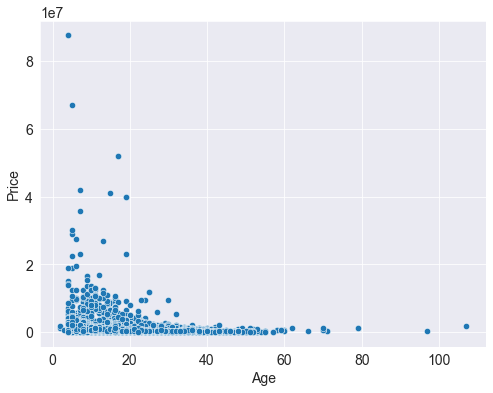

In [17]:
sns.scatterplot(x=cars_df.Age, y=cars_df.Price, s=40);

### Adding Log Price Column

In [18]:
cars_df['Log Price'] = cars_df['Price'].map(lambda p: np.log(p))

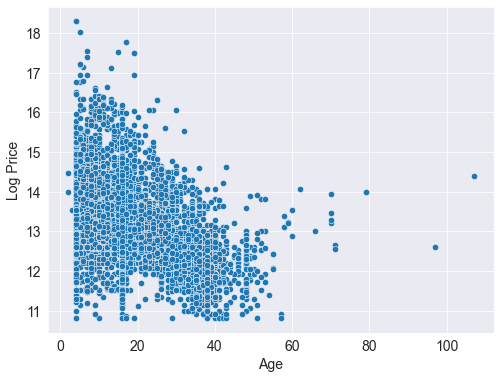

In [19]:
sns.scatterplot(x=cars_df.Age, y=cars_df['Log Price'], s=40);

### Relationship between Mileage and Price

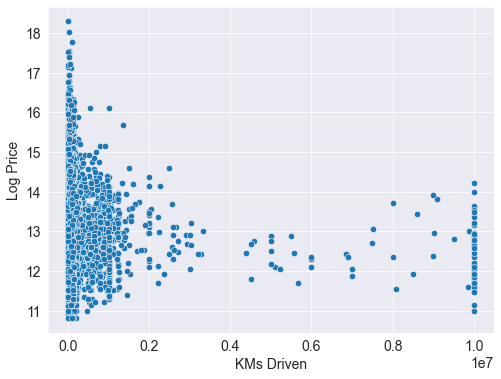

In [20]:
sns.scatterplot(x=cars_df['KMs Driven'], y=cars_df['Log Price'], s=40);

In [21]:
kms_outlier_index = cars_df.loc[(cars_df['KMs Driven'] < 1000) | (cars_df['KMs Driven'] > 1e6)].index

cars_df.drop(kms_outlier_index, axis=0, inplace=True)

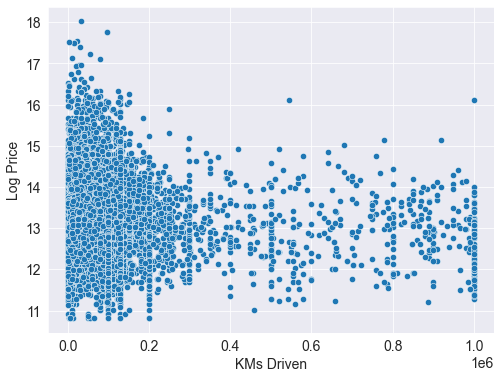

In [22]:
sns.scatterplot(x=cars_df['KMs Driven'], y=cars_df['Log Price'], s=40);

### European Vs. Non-european Brands

In [23]:
noneuropean_brands = cars_df[(cars_df.Brand != 'Range Rover') &  (cars_df.Brand != 'Audi') &  (cars_df.Brand != 'BMW') &  (cars_df.Brand != 'Mercedes') &  (cars_df.Brand != 'Porsche') &  (cars_df.Brand != 'Chevrolet') &  (cars_df.Brand != 'Land Rover')]

In [24]:
european_brands = cars_df[(cars_df.Brand == 'Range Rover') |  (cars_df.Brand == 'Audi') |  (cars_df.Brand == 'BMW') |  (cars_df.Brand == 'Mercedes') |  (cars_df.Brand == 'Porsche') |  (cars_df.Brand == 'Chevrolet') |  (cars_df.Brand == 'Land Rover')]

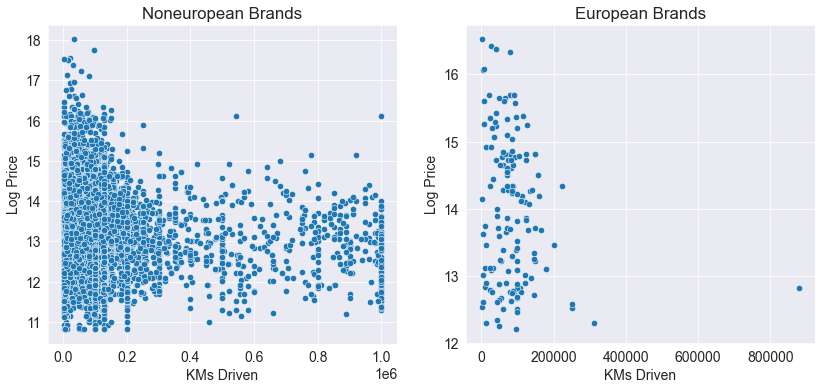

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Noneuropean Brands')
sns.scatterplot(x=noneuropean_brands['KMs Driven'], 
                y=noneuropean_brands['Log Price'],
                s=40, 
                ax=axes[0]);


axes[1].set_title('European Brands')
sns.scatterplot(x=european_brands['KMs Driven'], 
                y=european_brands['Log Price'],
                s=40, 
                ax=axes[1]);

plt.tight_layout(pad=2);


In [26]:
european_cars_fraction = (european_brands.shape[0])/(cars_df.shape[0]) * 100
european_cars_fraction

0.7603152526657395

### Popularity based on Fuel

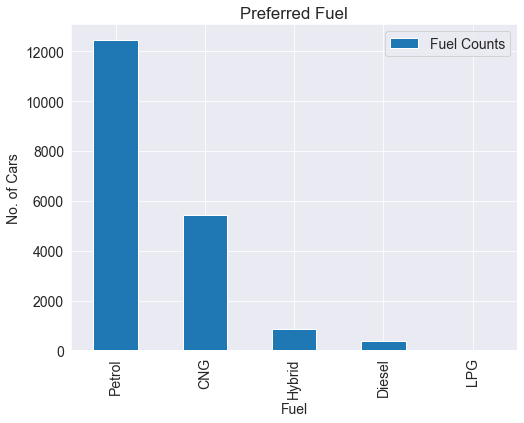

In [29]:
fuel= cars_df.groupby('Fuel')['Fuel'].count()
fuel = pd.DataFrame(fuel)
fuel.columns = ['Fuel Counts']
fuel.sort_values(by=['Fuel Counts'], inplace=True, ascending=False)
fuel = fuel.head(5)

fuel.plot.bar();

plt.title('Preferred Fuel')

plt.xlabel('Fuel')
plt.ylabel('No. of Cars');

### Sales of Top 10 Brands

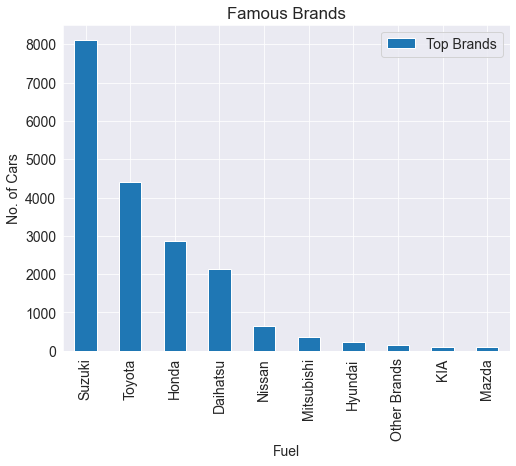

In [30]:
topbrands= cars_df.groupby('Brand')['Brand'].count()
topbrands = pd.DataFrame(topbrands)
topbrands.columns = ['Top Brands']
topbrands.sort_values(by=['Top Brands'], inplace=True, ascending=False)
topbrands = topbrands.head(10)

topbrands.plot.bar();

plt.title('Famous Brands')

plt.xlabel('Fuel')
plt.ylabel('No. of Cars');

### Correlation between Release Year and Kilometers Driven

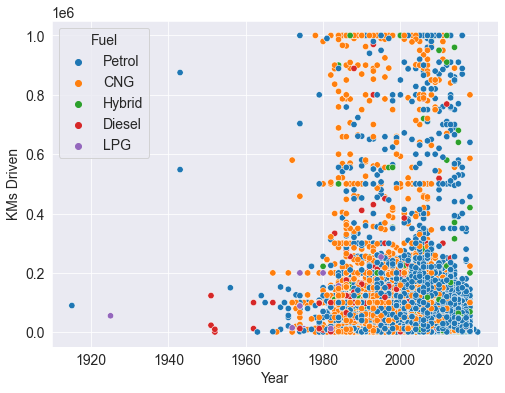

In [31]:
sns.scatterplot(x=cars_df.Year, y=cars_df['KMs Driven'], hue=cars_df.Fuel, s=40);

### Cities with Highest Registration of Cars

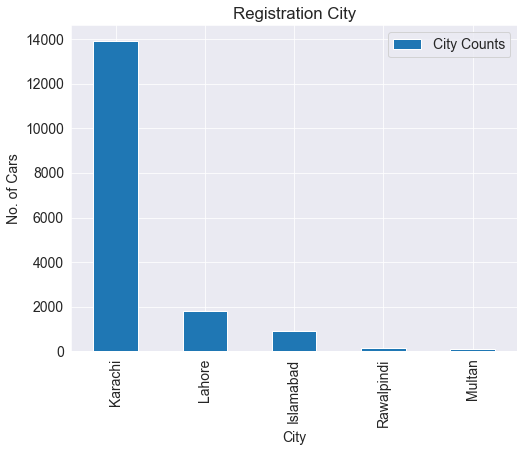

In [32]:
registration= cars_df.groupby('Registered City')['Registered City'].count()
registration = pd.DataFrame(registration)
registration.columns = ['City Counts']
registration.sort_values(by=['City Counts'], inplace=True, ascending=False)
registration = registration.head(5)

registration.plot.bar();

plt.title('Registration City')

plt.xlabel('City')
plt.ylabel('No. of Cars');

### Most Expensive Car Brands

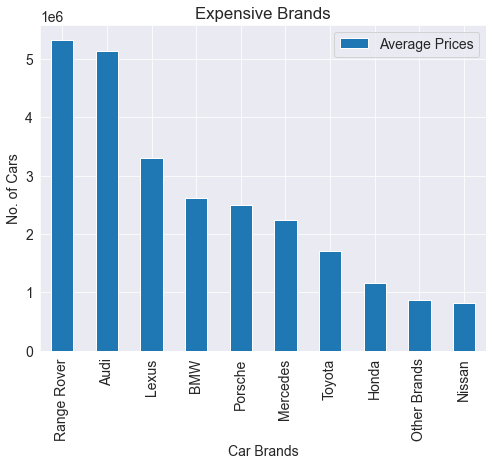

In [33]:
expensive= cars_df.groupby('Brand')['Price'].mean()
expensive = pd.DataFrame(expensive)
expensive.columns = ['Average Prices']
expensive.sort_values(by=['Average Prices'], inplace=True, ascending=False)
expensive = expensive.head(10)

expensive.plot.bar();

plt.title('Expensive Brands')

plt.xlabel('Car Brands')
plt.ylabel('No. of Cars');

### Distribution of Kilometers Driven

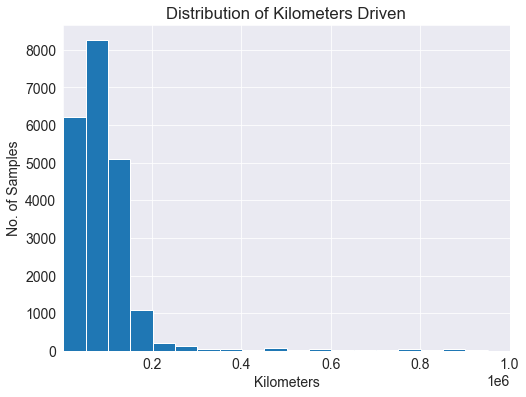

In [34]:
plt.title('Distribution of Kilometers Driven')

plt.hist(cars_df['KMs Driven'], bins=np.arange(1000, 1000000, 50000));

plt.xlabel('Kilometers')
plt.ylabel('No. of Samples')
plt.xlim(1000, 1000000);

### Distribution of Price

In [35]:
cars_price_df = cars_df[(cars_df.Price > 100000) & (cars_df.Price < 1000000)]

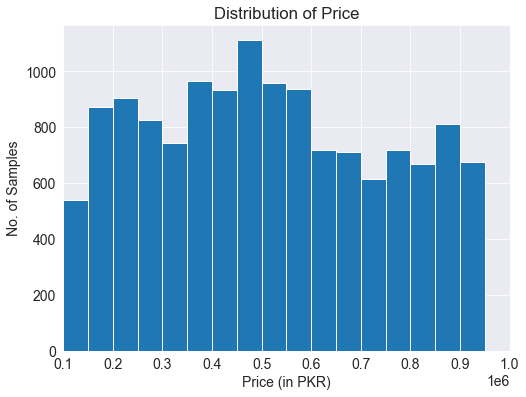

In [36]:
plt.title('Distribution of Price')

plt.hist(cars_price_df.Price, bins=np.arange(100000, 1000000, 50000));

plt.xlabel('Price (in PKR)')
plt.ylabel('No. of Samples')
plt.xlim(100000, 1000000);

### Price Distribution of Top 3 Brands

In [37]:
suzuki_cars_df = cars_df[cars_df.Brand == 'Suzuki']

In [38]:
suzuki_price_df = suzuki_cars_df[(suzuki_cars_df.Price > 100000) & (suzuki_cars_df.Price < 1000000) ]

In [39]:
toyota_cars_df = cars_df[cars_df.Brand == 'Toyota']

In [40]:
toyota_price_df = toyota_cars_df[(toyota_cars_df.Price > 100000) & (toyota_cars_df.Price < 1000000) ]

In [41]:
honda_cars_df = cars_df[cars_df.Brand == 'Honda']

In [42]:
honda_price_df = honda_cars_df[(honda_cars_df.Price > 100000) & (honda_cars_df.Price < 1000000) ]

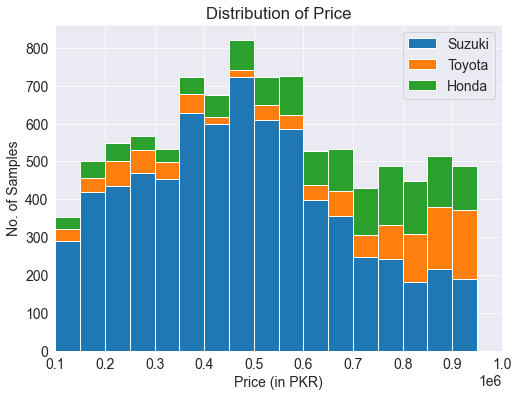

In [43]:
plt.title('Distribution of Price')

plt.hist([suzuki_cars_df.Price, toyota_cars_df.Price, honda_cars_df.Price], 
         bins=np.arange(100000, 1000000, 50000), 
         stacked=True);

plt.xlabel('Price (in PKR)')
plt.ylabel('No. of Samples')
plt.xlim(100000, 1000000)
plt.legend(['Suzuki', 'Toyota', 'Honda']);

## Answering Some Basic Questions

### What is the average price of Suzuki, Toyota and Honda cars i.e. the 3 most famous car brands in Pakistan ?

In [44]:
cars_df.groupby('Brand')['Price'].mean()

Brand
Audi                  5.132857e+06
BMW                   2.609167e+06
Changan               4.428571e+05
Chevrolet             4.001053e+05
Classic & Antiques    6.458636e+05
Daewoo                3.152500e+05
Daihatsu              7.252203e+05
FAW                   7.821346e+05
Honda                 1.168916e+06
Hyundai               4.070963e+05
KIA                   4.893979e+05
Land Rover            2.280000e+05
Lexus                 3.305455e+06
Mazda                 7.746067e+05
Mercedes              2.233987e+06
Mitsubishi            7.379945e+05
Nissan                8.175428e+05
Other Brands          8.647326e+05
Porsche               2.500000e+06
Range Rover           5.316500e+06
Subaru                7.103801e+05
Suzuki                5.670741e+05
Toyota                1.702210e+06
Name: Price, dtype: float64

## Cars from which release years are most cheapest (on average) in Pakistan for the release years beyond 2000 ?

In [45]:
car_price_by_year = cars_df[cars_df.Year > 2000]

In [46]:
car_price_by_year.groupby('Year')['Price'].mean().sort_values()

Year
2001.000000    5.409161e+05
2004.000000    6.432445e+05
2002.000000    6.736076e+05
2006.000000    6.881787e+05
2019.000000    7.500000e+05
2007.000000    8.036900e+05
2008.000000    8.118056e+05
2005.000000    8.171669e+05
2005.901626    8.302848e+05
2009.000000    9.639948e+05
2010.000000    9.687980e+05
2003.000000    1.024906e+06
2011.000000    1.083504e+06
2012.000000    1.174270e+06
2013.000000    1.315551e+06
2014.000000    1.400761e+06
2016.000000    1.553723e+06
2015.000000    1.591767e+06
2018.000000    1.672940e+06
2017.000000    1.852652e+06
2020.000000    1.950000e+06
Name: Price, dtype: float64

### Which brand cars have covered most kilometers on the roads ?

In [47]:
cars_df.groupby('Brand')['KMs Driven'].sum().sort_values(ascending=False)

Brand
Suzuki                7.438469e+08
Toyota                4.105627e+08
Honda                 2.988765e+08
Daihatsu              1.951336e+08
Nissan                6.852948e+07
Mitsubishi            4.109648e+07
Hyundai               2.491416e+07
Other Brands          1.656000e+07
KIA                   1.285808e+07
Daewoo                8.192211e+06
Mazda                 6.885928e+06
Mercedes              6.330069e+06
Chevrolet             4.050267e+06
Lexus                 3.002061e+06
FAW                   2.942432e+06
Subaru                2.434621e+06
Classic & Antiques    2.127463e+06
BMW                   1.905312e+06
Audi                  9.086730e+05
Changan               7.661012e+05
Range Rover           4.668780e+05
Porsche               1.770000e+05
Land Rover            4.500000e+04
Name: KMs Driven, dtype: float64

### Which fuel type cars are cheapest on average ?

In [49]:
cars_df.groupby('Fuel')['Price'].mean().sort_values()

Fuel
LPG       2.290870e+05
CNG       4.476130e+05
Petrol    1.114737e+06
Hybrid    1.667171e+06
Diesel    2.024526e+06
Name: Price, dtype: float64

### Which city has the highest registered Mercedes cars ?

In [50]:
cars_df[cars_df.Brand == 'Mercedes']['Registered City'].value_counts()

Karachi      58
Islamabad    12
Lahore        5
Khushab       1
Name: Registered City, dtype: int64